In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("Fraud.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
len(df['nameOrig'].unique())

69858

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69858 entries, 0 to 69857
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            69858 non-null  int64  
 1   type            69858 non-null  object 
 2   amount          69858 non-null  float64
 3   nameOrig        69858 non-null  object 
 4   oldbalanceOrg   69858 non-null  float64
 5   newbalanceOrig  69858 non-null  float64
 6   nameDest        69858 non-null  object 
 7   oldbalanceDest  69858 non-null  float64
 8   newbalanceDest  69857 non-null  float64
 9   isFraud         69857 non-null  float64
 10  isFlaggedFraud  69857 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,69858.000000,6.985800e+04,6.985800e+04,6.985800e+04,6.985800e+04,6.985700e+04,69857.000000,69857.0
mean,7.893326,1.640176e+05,9.043066e+05,9.202980e+05,8.543522e+05,1.185141e+06,0.001532,0.0
std,1.874512,3.313730e+05,2.791616e+06,2.829881e+06,2.403000e+06,2.871791e+06,0.039107,0.0
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.011012e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,4.404918e+04,1.990850e+04,0.000000e+00,1.416050e+04,2.113068e+04,0.000000,0.0
75%,9.000000,1.991307e+05,1.721175e+05,1.940205e+05,5.186073e+05,9.824113e+05,0.000000,0.0
max,9.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.130692e+07,3.197699e+07,1.000000,0.0


In [ ]:
df=df.drop(['step'], axis = 1)
df=df.drop(['nameOrig'], axis = 1)
df=df.drop(['nameDest'], axis = 1)

In [ ]:
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [ ]:
# to have a more manageable data to work with
data = df.sample(frac = 0.1, random_state = 1)
print(df.shape)

(69858, 8)


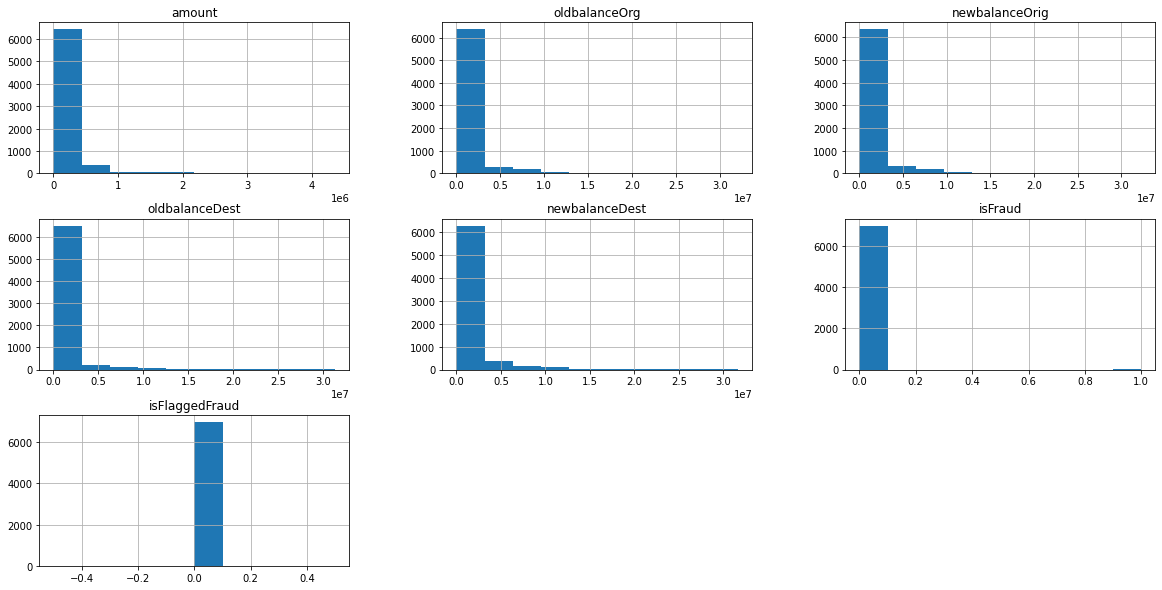

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# print histogram for each parameter
data.hist(figsize=(20,10))
plt.show()

In [24]:
# number of fraud and valid cases
fraud = data[data['isFraud'] == 1]
valid = data[data['isFraud'] == 0]

outlier_frac = len(fraud) / float(len(valid))
print(outlier_frac)

print("fraud cases: {}".format(len(fraud)))
print("valid cases: {}".format(len(valid)))

0.0012899527017342697
fraud cases: 9
valid cases: 6977


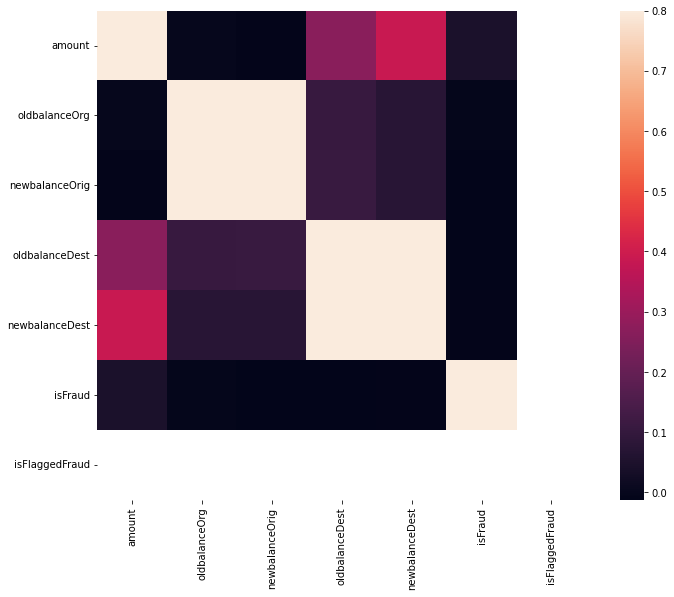

In [25]:
# correlation matrix
cormat = df.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(cormat, vmax = 0.8, square=True)
plt.show()

In [26]:
# get all columns from the dataframe
col = data.columns.tolist()

# filter the columns to remove the data we do not want
col = [c for c in col if c not in ['isFraud']]

# store the variable we'll be predicting 
target = 'isFraud'

X = data[col]
Y = data[target]

print(X.shape)
print(Y.shape)

(6986, 7)
(6986,)


In [27]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
26040,PAYMENT,109.25,0.00,0.00,0.00,0.00,0.0
68212,CASH_OUT,278265.53,0.00,0.00,464027.82,743340.41,0.0
37823,PAYMENT,14610.34,0.00,0.00,0.00,0.00,0.0
45185,CASH_IN,20087.51,1110462.88,1130550.39,71870.94,51783.43,0.0
43123,CASH_OUT,31921.13,0.00,0.00,228170.70,260091.84,0.0


In [28]:
#Data cleaning
df1=pd.get_dummies(df,columns=['type'])
df1.sample(4)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
59274,125485.79,18164540.36,18290026.15,846826.98,109837.19,0.0,0.0,1,0,0,0,0
17635,9838.96,13186998.50,13196837.45,1028180.82,643199.54,0.0,0.0,1,0,0,0,0
64893,36274.30,114247.00,150521.30,0.00,0.00,0.0,0.0,1,0,0,0,0
44857,16489.85,49539.00,33049.15,0.00,0.00,0.0,0.0,0,0,0,1,0


In [29]:
x=df1.loc[:,['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']]
y=df1.loc[:,'isFraud']

In [30]:
mx=MinMaxScaler()
mx.fit(x)
x=pd.DataFrame(mx.transform(x),columns=x.columns)
x

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.000984,0.005034,0.004713,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000186,0.000629,0.000570,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000018,0.000005,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000018,0.000005,0.000000,0.000677,0.0,0.0,1.0,0.0,0.0,0.0
4,0.001167,0.001230,0.000879,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
69853,0.003068,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
69854,0.000287,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
69855,0.000293,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
69856,0.000370,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
np.isnan(x.any())
x=x.dropna()

In [40]:
np.isnan(y.any())
y=y.dropna()

In [41]:
# Splitting train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=1)

In [42]:
df2=df1.sample(200)

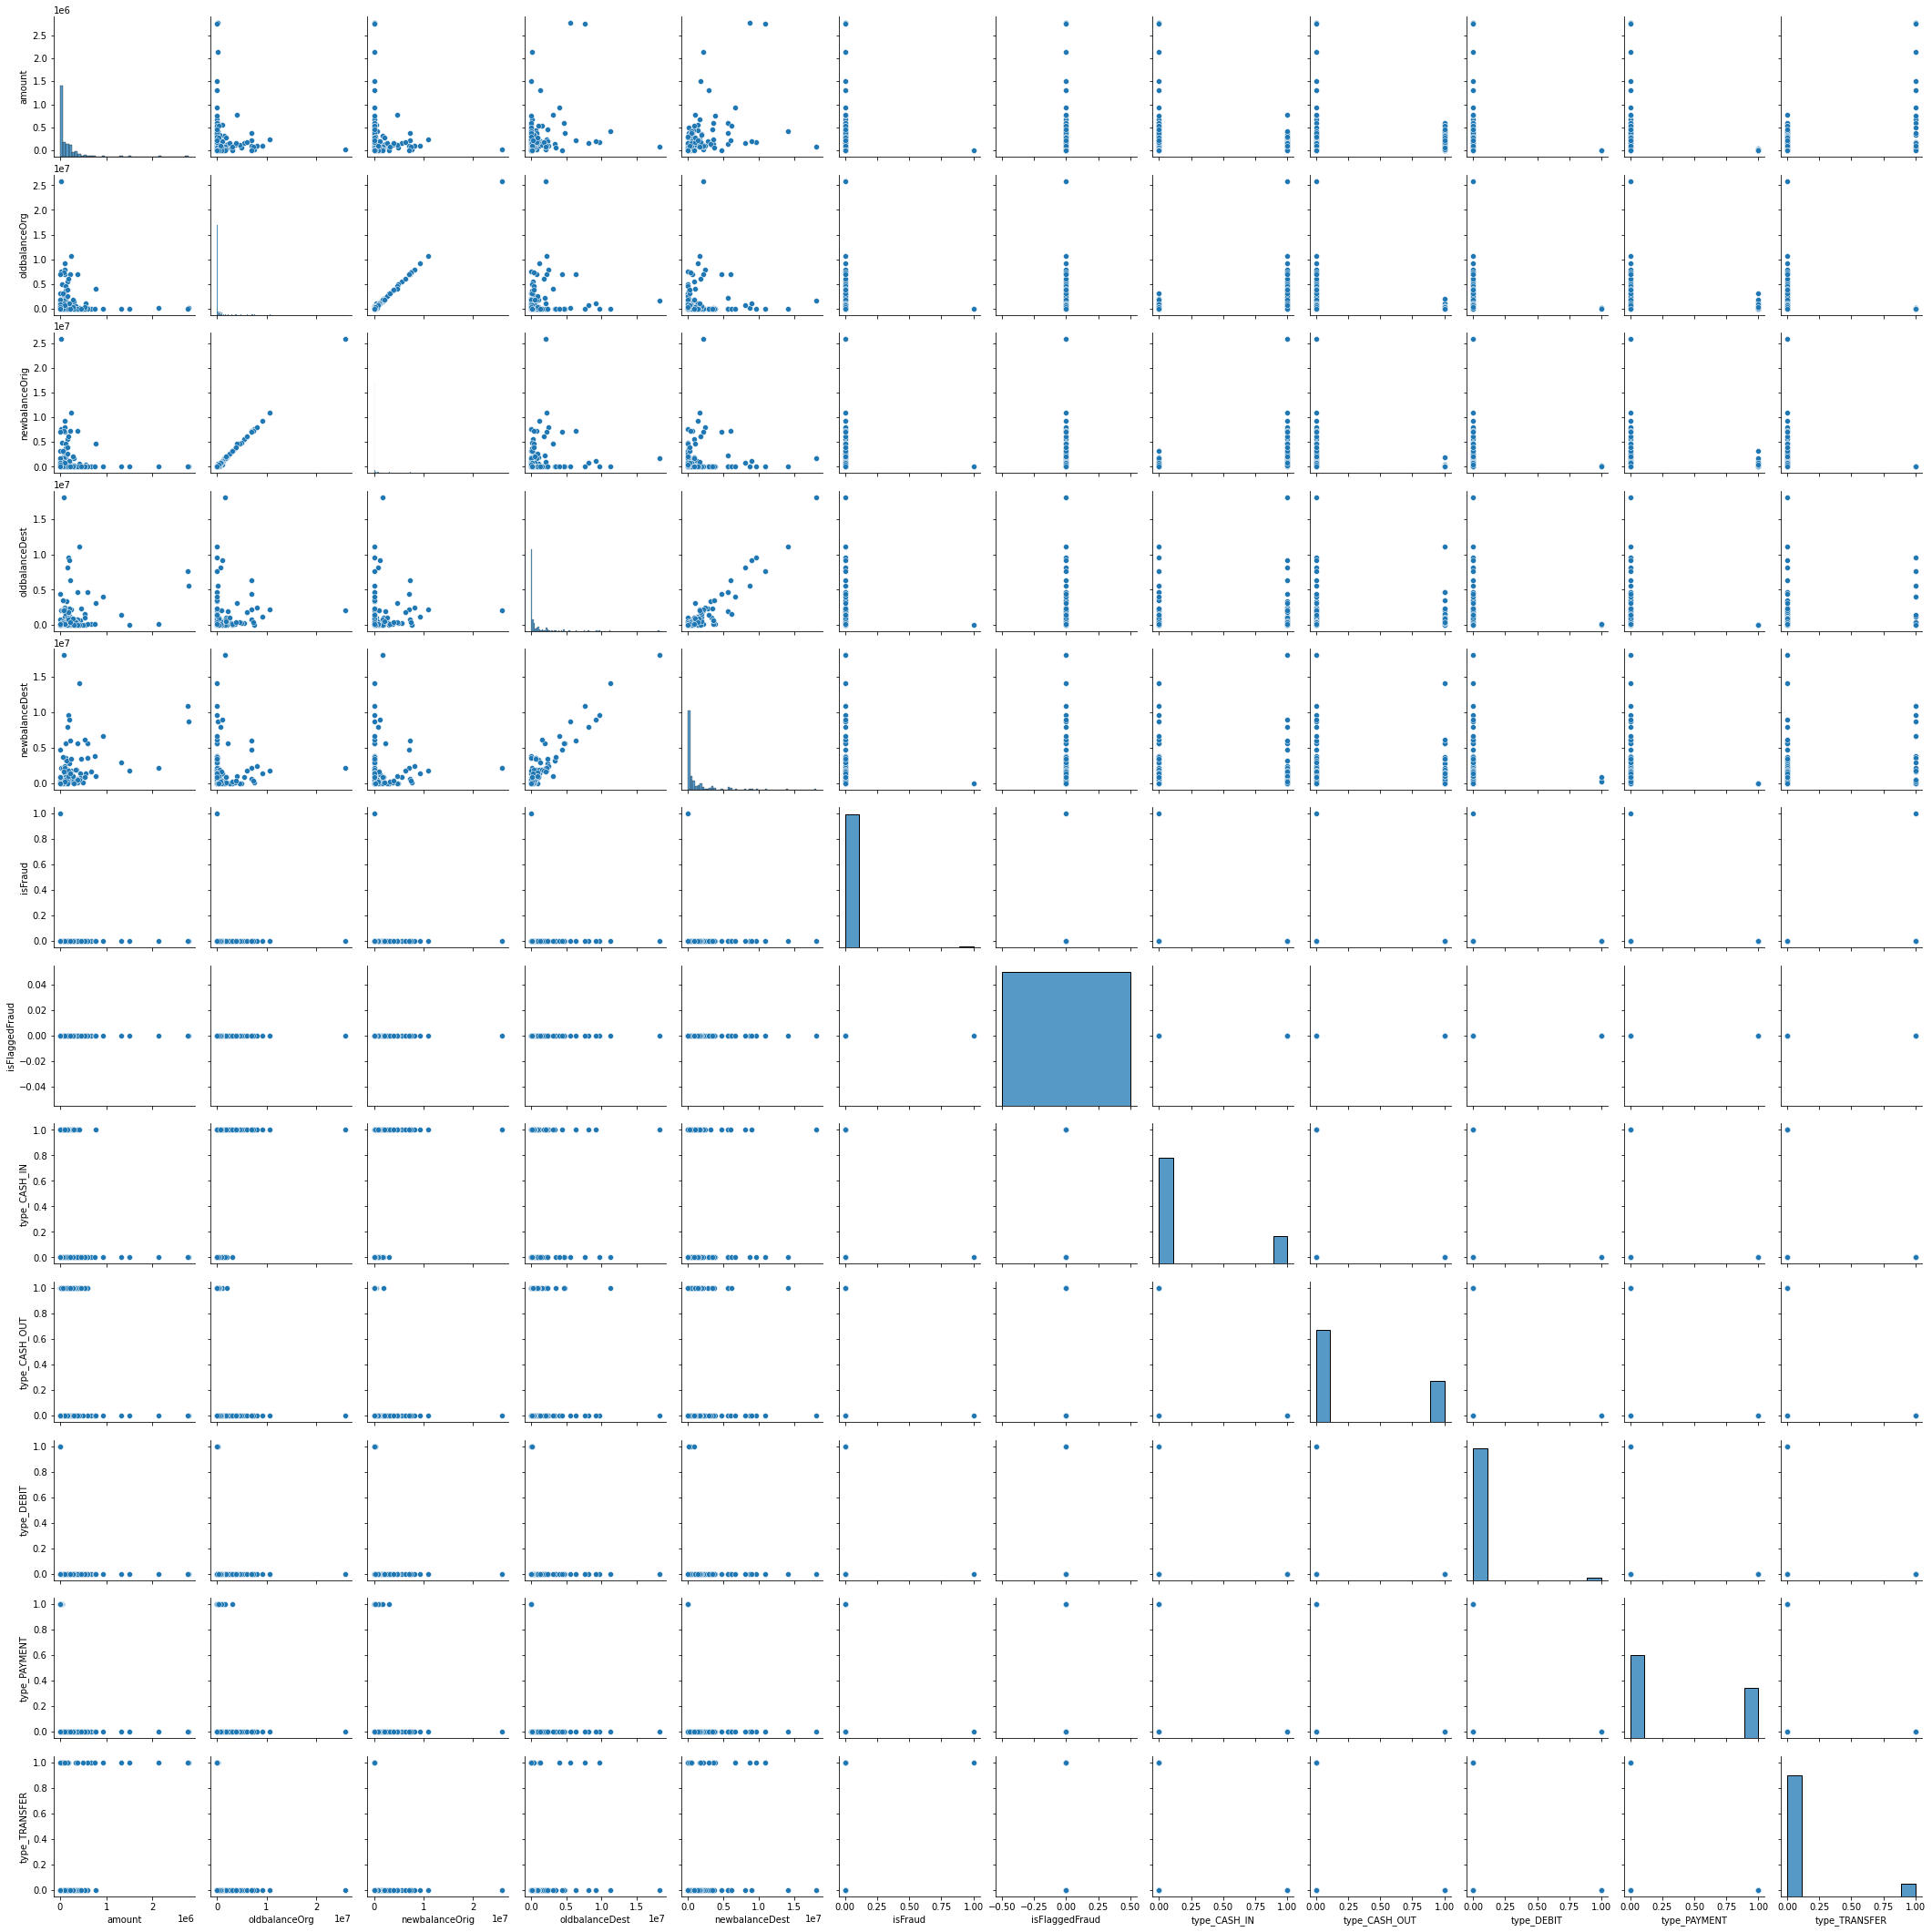

<Figure size 432x288 with 0 Axes>

In [43]:
#finding the collinearity
sns.pairplot(df2)
plt.figure()
plt.show()

In [44]:
#model is selected by checking every classification model accuracy 
#applying logistic regression first

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [45]:
pred= lr.predict(x_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
from sklearn import metrics
print ("Accuracy : ", metrics.accuracy_score(y_test, pred))


Accuracy :  0.9984731367496898


In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, pred)

array([[20926,     0],
       [   32,     0]])